<a href="https://colab.research.google.com/github/cow-coding/School-Project/blob/master/Computer%20Science/Machine%20Learning/Wine%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [5]:
from tensorflow import keras

keras.__version__

'2.4.0'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [7]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [8]:
import numpy as np
np.__version__

'1.19.5'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [9]:
#########################코드########################


white_wine = pd.read_csv('wine data/winequality-white.csv')
red_wine = pd.read_csv('wine data/winequality-red.csv')


#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [10]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [16]:
#####################################################
def generate_data(df, t_r):
    X = df.drop(['quality'], axis=1)
    Y = df['quality']

    X_train = X.sample(frac=t_r, random_state=1)
    Y_train = Y.sample(frac=t_r, random_state=1)
    X_test = X.sample(frac=1-t_r, random_state=1)
    Y_test = Y.sample(frac=1-t_r, random_state=1)

    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [42]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [43]:
print("Train X size : {}".format(len(x_train)))
print("Train Y size : {}".format(len(y_train)))
print("Test X size : {}".format(len(x_test)))
print("Test Y size : {}".format(len(y_test)))
print("Train set ratio : {}".format(len(x_train) / len(white_wine)))
print("Test set ratio : {}".format(len(x_test) / len(white_wine)))

Train X size : 3429
Train Y size : 3429
Test X size : 1469
Test Y size : 1469
Train set ratio : 0.7000816659861168
Test set ratio : 0.29991833401388324


작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [51]:
##########################################################

keras.backend.clear_session()

white_model = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

white_model.compile(optimizer=keras.optimizers.Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

white_hist = white_model.fit(x_train, y_train, epochs=100)
white_eval = white_model.evaluate(x_test, y_test)

# red wine modeling

red_x_train, red_y_train, red_x_test, red_y_test = generate_data(red_wine, 0.7)

red_model = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

red_model.compile(optimizer=keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

red_hist = red_model.fit(red_x_train, red_y_train, epochs=100)
red_eval = red_model.evaluate(red_x_test, red_y_test)

###########################################################

Epoch 1/100
108/108 [==============================] - 0s 1ms/step - loss: 1.8084 - accuracy: 0.3254
Epoch 2/100
108/108 [==============================] - 0s 1ms/step - loss: 1.3457 - accuracy: 0.4456
Epoch 3/100
108/108 [==============================] - 0s 1ms/step - loss: 1.3107 - accuracy: 0.4417
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2987 - accuracy: 0.4368
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2730 - accuracy: 0.4499
Epoch 6/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2892 - accuracy: 0.4332
Epoch 7/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2654 - accuracy: 0.4514
Epoch 8/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2396 - accuracy: 0.4578
Epoch 9/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2469 - accuracy: 0.4637
Epoch 10/100
108/108 [==============================] - 0s 1ms/step - loss: 1.2560 - accura

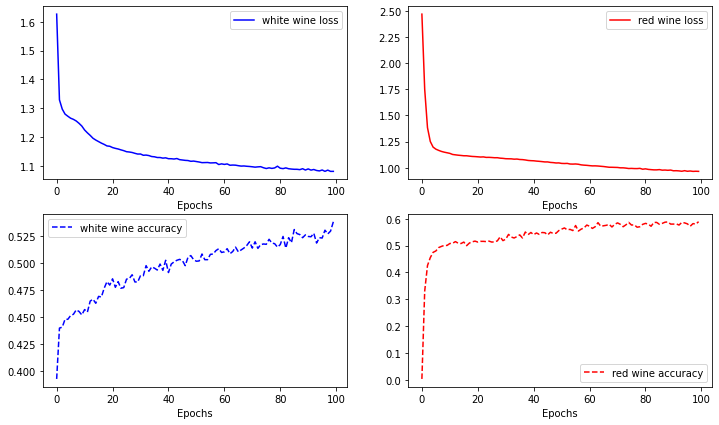

Accuracy (white) : 0.5058
Accuracy (red) : 0.6042


In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(white_hist.history['loss'], 'b-', label='white wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(red_hist.history['loss'], 'r-', label='red wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(white_hist.history['accuracy'], 'b--', label='white wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(red_hist.history['accuracy'], 'r--', label='red wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

print("Accuracy (white) : %0.4f" %white_eval[1])
print("Accuracy (red) : %0.4f" %red_eval[1])


### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [69]:
##########################################################
# white wine upgrade

keras.backend.clear_session()

white_model_up = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(10, activation='softmax')
])

white_model_up.compile(optimizer=keras.optimizers.Adam(),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

white_hist_up = white_model_up.fit(x_train, y_train, epochs=300)
white_eval_up = white_model_up.evaluate(x_test, y_test)

###########################################################

Epoch 1/300
108/108 [==============================] - 1s 4ms/step - loss: 3.5723 - accuracy: 0.3409
Epoch 2/300
108/108 [==============================] - 0s 4ms/step - loss: 1.4933 - accuracy: 0.4028
Epoch 3/300
108/108 [==============================] - 0s 4ms/step - loss: 1.3208 - accuracy: 0.4239
Epoch 4/300
108/108 [==============================] - 0s 4ms/step - loss: 1.3249 - accuracy: 0.4233
Epoch 5/300
108/108 [==============================] - 0s 4ms/step - loss: 1.3449 - accuracy: 0.3879
Epoch 6/300
108/108 [==============================] - 0s 5ms/step - loss: 1.2488 - accuracy: 0.4361
Epoch 7/300
108/108 [==============================] - 0s 4ms/step - loss: 1.2475 - accuracy: 0.4323
Epoch 8/300
108/108 [==============================] - 0s 4ms/step - loss: 1.2097 - accuracy: 0.4581
Epoch 9/300
108/108 [==============================] - 0s 4ms/step - loss: 1.2641 - accuracy: 0.4296
Epoch 10/300
108/108 [==============================] - 0s 4ms/step - loss: 1.2109 - accura

In [70]:
# red wine upgrade
red_model_up = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(10, activation='softmax')
])

red_model_up.compile(optimizer=keras.optimizers.Adam(),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

red_hist_up = red_model_up.fit(red_x_train, red_y_train, epochs=300)
red_eval_up = red_model_up.evaluate(red_x_test, red_y_test)

Epoch 1/300
35/35 [==============================] - 1s 4ms/step - loss: 3.0911 - accuracy: 0.3748
Epoch 2/300
35/35 [==============================] - 0s 5ms/step - loss: 1.2610 - accuracy: 0.4855
Epoch 3/300
35/35 [==============================] - 0s 5ms/step - loss: 1.1693 - accuracy: 0.4981
Epoch 4/300
35/35 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.5084
Epoch 5/300
35/35 [==============================] - 0s 4ms/step - loss: 1.0869 - accuracy: 0.5341
Epoch 6/300
35/35 [==============================] - 0s 4ms/step - loss: 1.0718 - accuracy: 0.5647
Epoch 7/300
35/35 [==============================] - 0s 4ms/step - loss: 1.1300 - accuracy: 0.5003
Epoch 8/300
35/35 [==============================] - 0s 4ms/step - loss: 1.0819 - accuracy: 0.4987
Epoch 9/300
35/35 [==============================] - 0s 4ms/step - loss: 1.0648 - accuracy: 0.5680
Epoch 10/300
35/35 [==============================] - 0s 5ms/step - loss: 1.0862 - accuracy: 0.5023
Epoch 11/

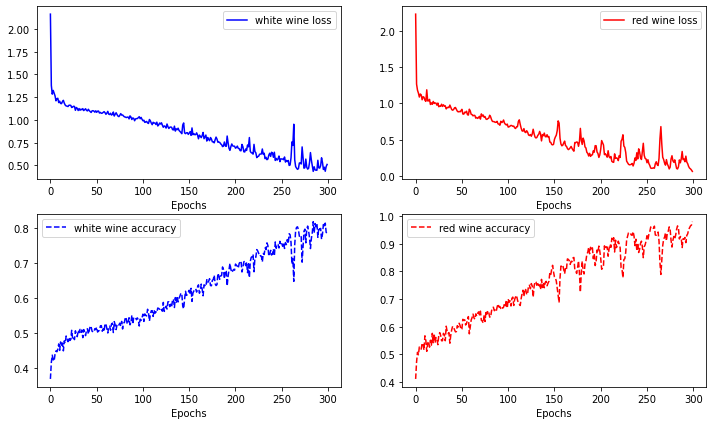

Accuracy (white) : 0.8155
Accuracy (red) : 0.9854


In [71]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.plot(white_hist_up.history['loss'], 'b-', label='white wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(red_hist_up.history['loss'], 'r-', label='red wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(white_hist_up.history['accuracy'], 'b--', label='white wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(red_hist_up.history['accuracy'], 'r--', label='red wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

print("Accuracy (white) : %0.4f" %white_eval_up[1])
print("Accuracy (red) : %0.4f" %red_eval_up[1])

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [85]:
total_data = pd.concat([white_wine, red_wine], ignore_index=True)
total_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [99]:
##########################################################
from sklearn.preprocessing import StandardScaler

keras.backend.clear_session()

total_x_train = np.concatenate((x_train, red_x_train), axis=0)
total_y_train = np.concatenate((y_train, red_y_train), axis=0)
total_x_test = np.concatenate((x_test, red_x_test), axis=0)
total_y_test = np.concatenate((y_test, red_y_test), axis=0)

total_model = Sequential([
    keras.layers.InputLayer(input_shape=(11,)),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(256, activation='selu'),
    Dense(10, activation='softmax')
])

total_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

scaler = StandardScaler()
scaler.fit(total_x_train)
scale_x_train = scaler.transform(total_x_train)
scale_x_test = scaler.transform(total_x_test)

total_hist = total_model.fit(scale_x_train, total_y_train, epochs=300)
total_eval = total_model.evaluate(scale_x_test, total_y_test)
###########################################################

Epoch 1/300
143/143 [==============================] - 1s 4ms/step - loss: 1.4929 - accuracy: 0.4456
Epoch 2/300
143/143 [==============================] - 1s 4ms/step - loss: 1.1117 - accuracy: 0.5311
Epoch 3/300
143/143 [==============================] - 1s 4ms/step - loss: 1.0658 - accuracy: 0.5417
Epoch 4/300
143/143 [==============================] - 1s 4ms/step - loss: 1.0563 - accuracy: 0.5505
Epoch 5/300
143/143 [==============================] - 1s 4ms/step - loss: 1.0387 - accuracy: 0.5528
Epoch 6/300
143/143 [==============================] - 1s 4ms/step - loss: 1.0402 - accuracy: 0.5612
Epoch 7/300
143/143 [==============================] - 1s 4ms/step - loss: 0.9965 - accuracy: 0.5656
Epoch 8/300
143/143 [==============================] - 1s 4ms/step - loss: 1.0351 - accuracy: 0.5469
Epoch 9/300
143/143 [==============================] - 1s 4ms/step - loss: 1.0185 - accuracy: 0.5626
Epoch 10/300
143/143 [==============================] - 1s 4ms/step - loss: 0.9762 - accura

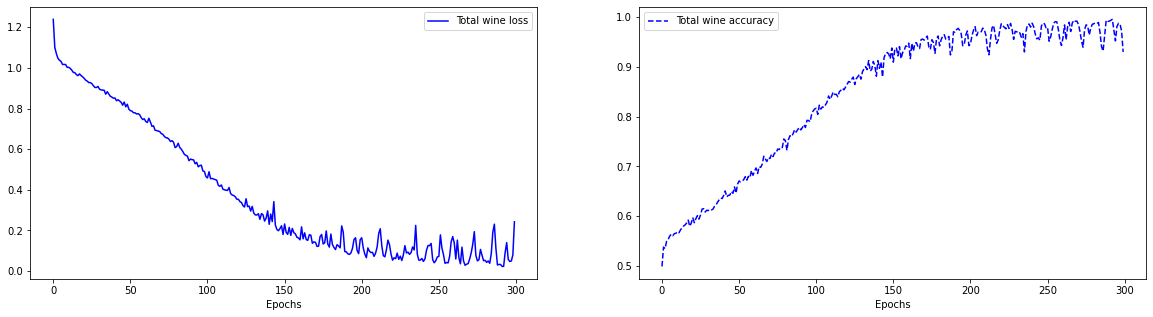

Accuracy (total) : 0.9636


In [100]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(total_hist.history['loss'], 'b-', label='Total wine loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(total_hist.history['accuracy'], 'b--', label='Total wine accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

print("Accuracy (total) : %0.4f" %total_eval[1])